In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
comp = pd.read_csv("C:/Users/Pooja/Desktop/data science/assignments/Decision Trees/Company_Data.csv")
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
comp.shape

(400, 11)

In [5]:
comp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

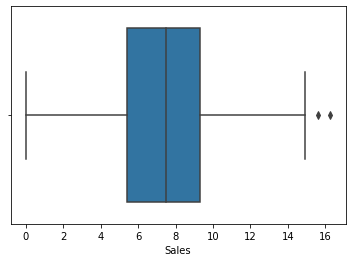

In [6]:
sns.boxplot(comp["Sales"])

In [ ]:
Data has 2 outlier instances.

In [7]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"
    
comp.Sales=comp.Sales.apply(split)
    

<AxesSubplot:>

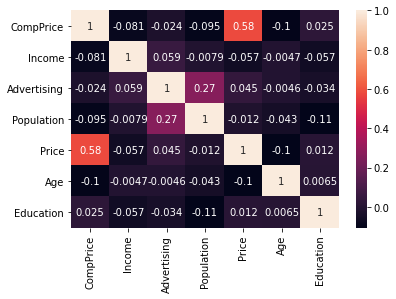

In [8]:
corr=comp.corr()
sns.heatmap(corr,annot=True)

In [9]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high sale,111,48,16,260,83,Good,65,10,Yes,Yes
2,high sale,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average sale,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low sale,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high sale,138,108,17,203,128,Good,33,14,Yes,Yes
396,average sale,139,23,3,37,120,Medium,55,11,No,Yes
397,average sale,162,26,12,368,159,Medium,40,18,Yes,Yes
398,average sale,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
le=LabelEncoder()
comp["ShelveLoc"]=le.fit_transform(comp["ShelveLoc"])
comp["Urban"]=le.fit_transform(comp["Urban"])
comp["US"]=le.fit_transform(comp["US"])

In [18]:
y=comp.iloc[:,0]
x=comp.iloc[:,1:11]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=DE(criterion="entropy",max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

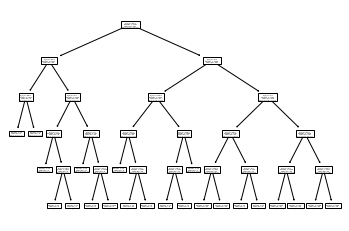

In [12]:
from sklearn import tree
tree.plot_tree(model);

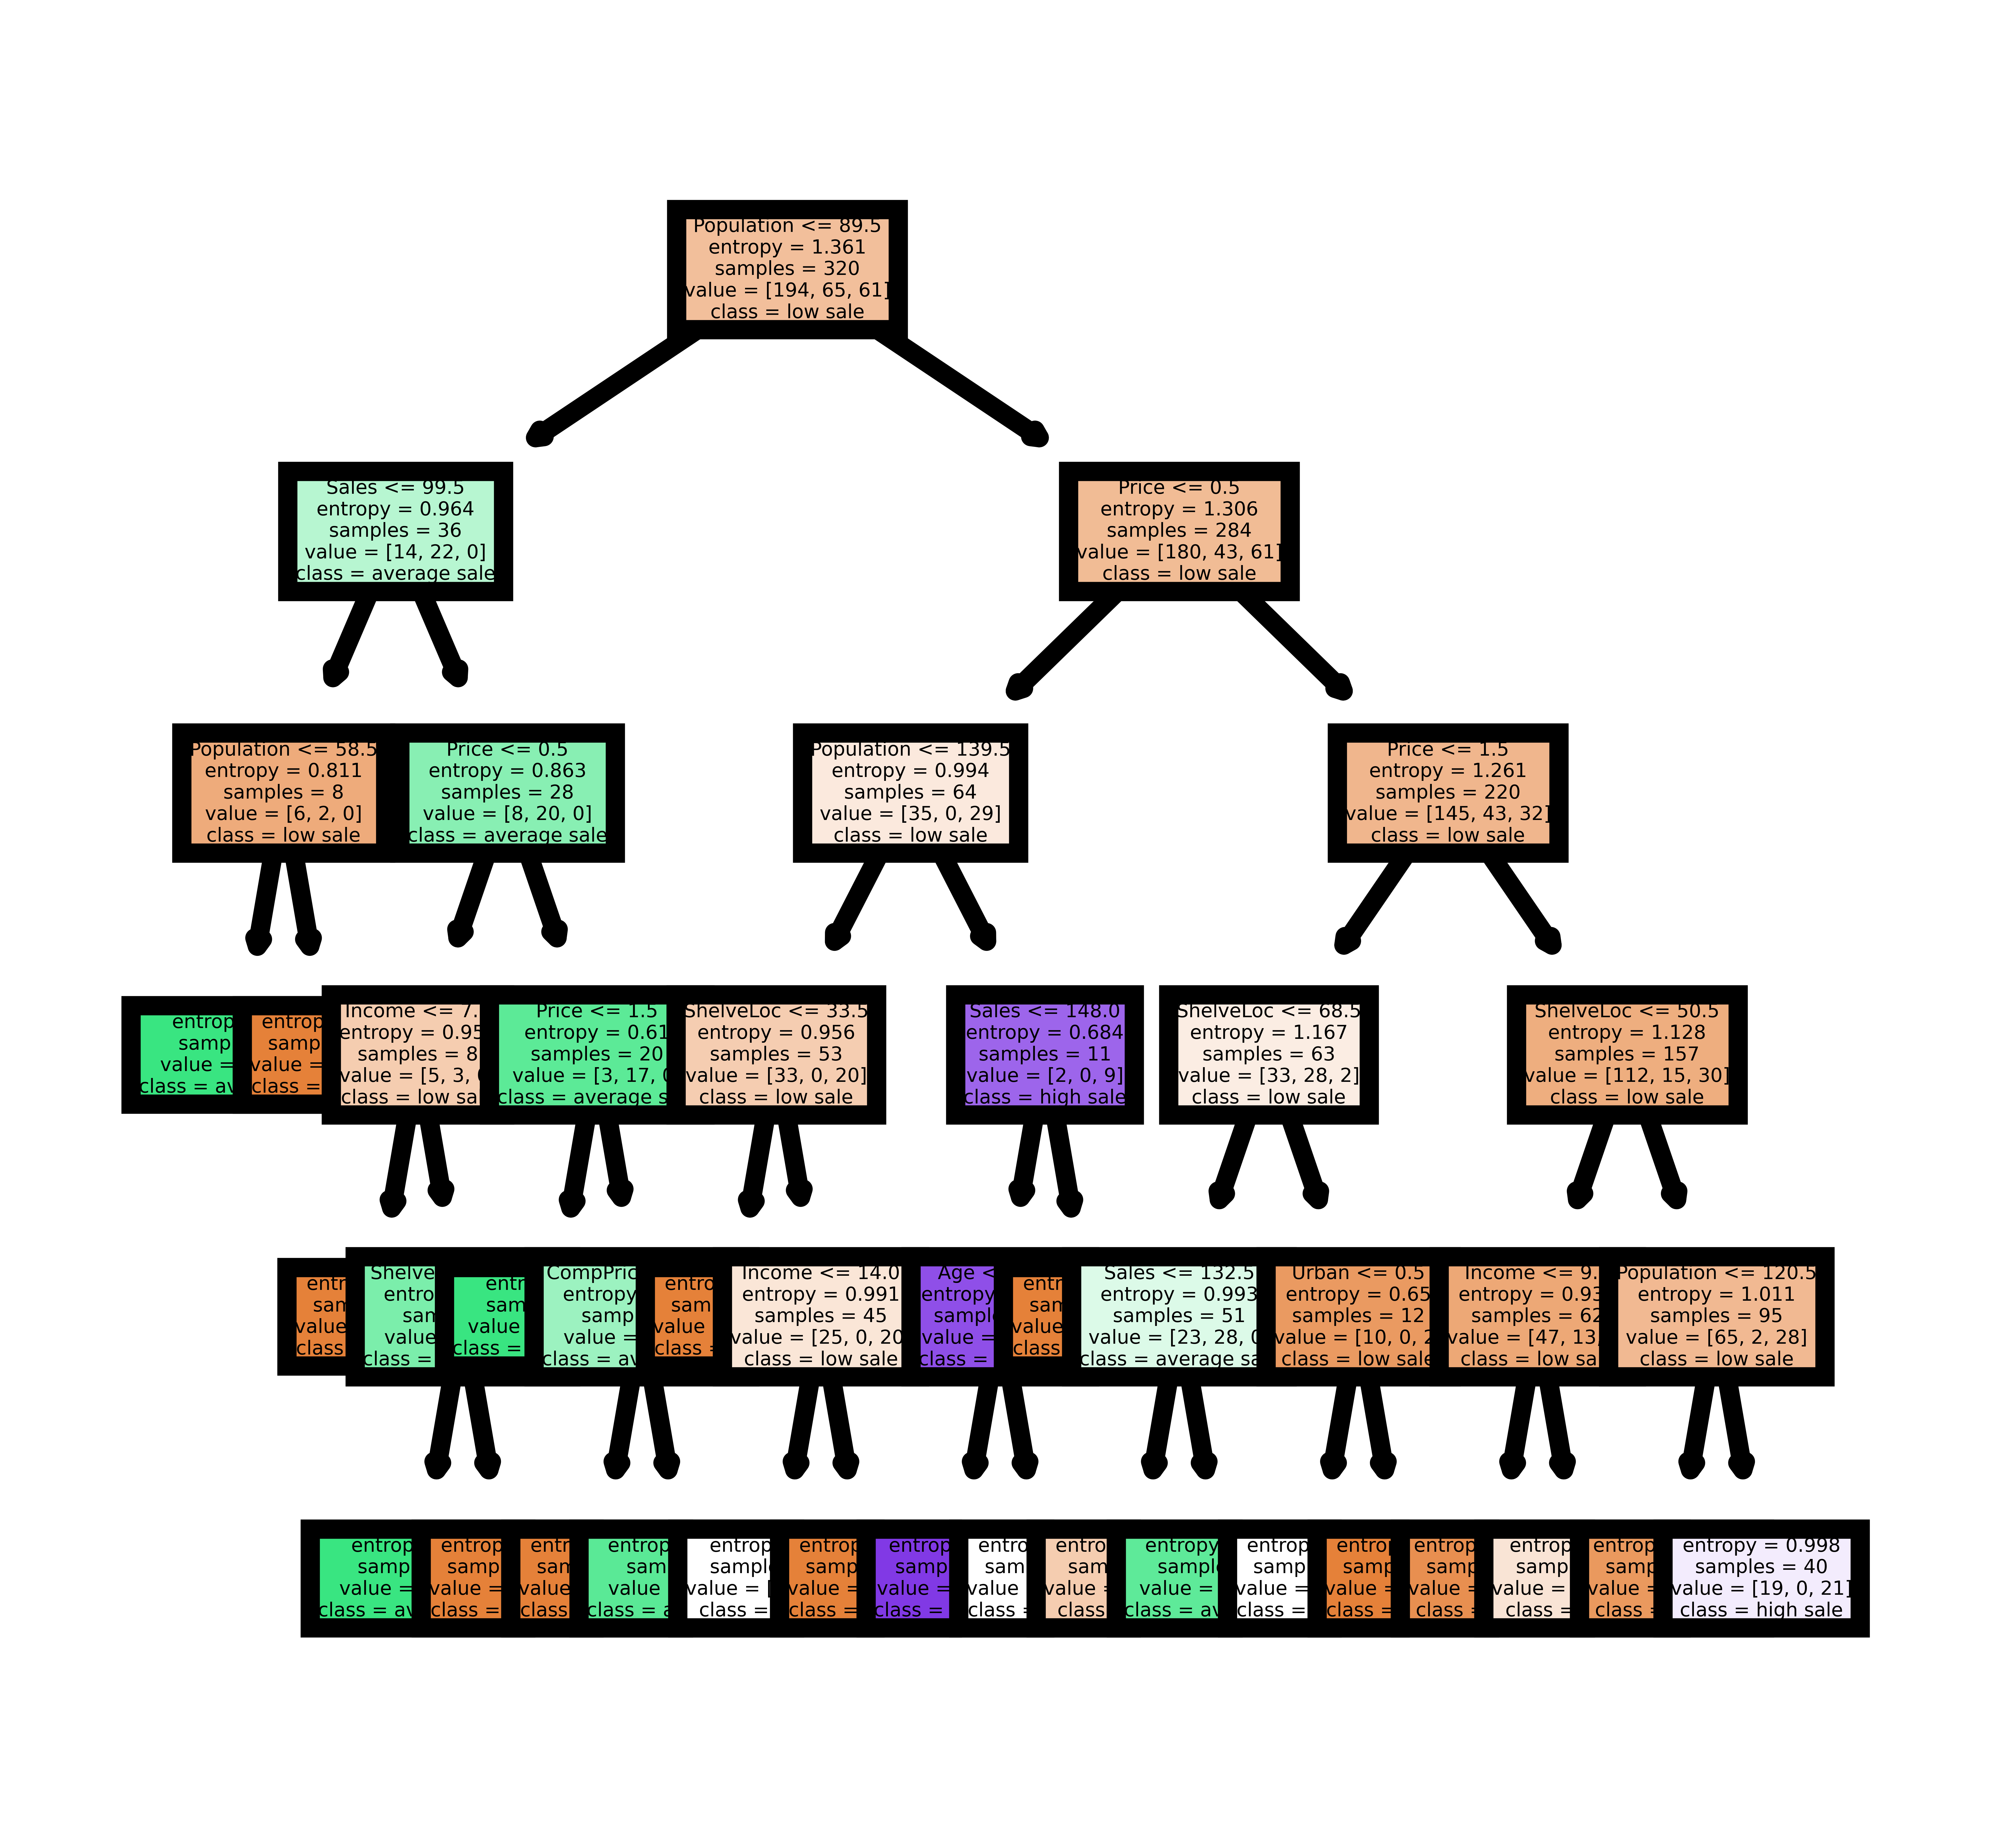

In [13]:
fn=["Sales","CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
cn=["low sale","average sale","high sale"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(1.5,1.5),dpi=5000)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [14]:
preds=model.predict(x_test)
confusion_matrix(y_test,preds)

array([[38,  4,  8],
       [ 8,  6,  0],
       [14,  0,  2]], dtype=int64)

In [20]:
preds = model.predict(x_train)
accuracy_score(y_train,preds)

0.840625

In [21]:
confusion_matrix(y_train,preds)

array([[174,  11,   8],
       [  9,  55,   0],
       [ 23,   0,  40]], dtype=int64)

In [15]:
accuracy_score(y_test,preds)

0.575

In [16]:
pd.Series(preds).value_counts()

average sale    60
low sale        10
high sale       10
dtype: int64

In [17]:
df=pd.DataFrame({"actual":y_test,"predicted":preds})
df

,actual,predicted
363,high sale,average sale
150,high sale,average sale
379,average sale,average sale
25,high sale,high sale
290,average sale,average sale
...,...,...
52,average sale,average sale
244,average sale,average sale
125,average sale,high sale
24,high sale,average sale
